 In this notebook, I explore images to find lane lines 

In [2]:
#import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

from IPython.html import widgets
%matplotlib inline

# Abs Sobel Thresh

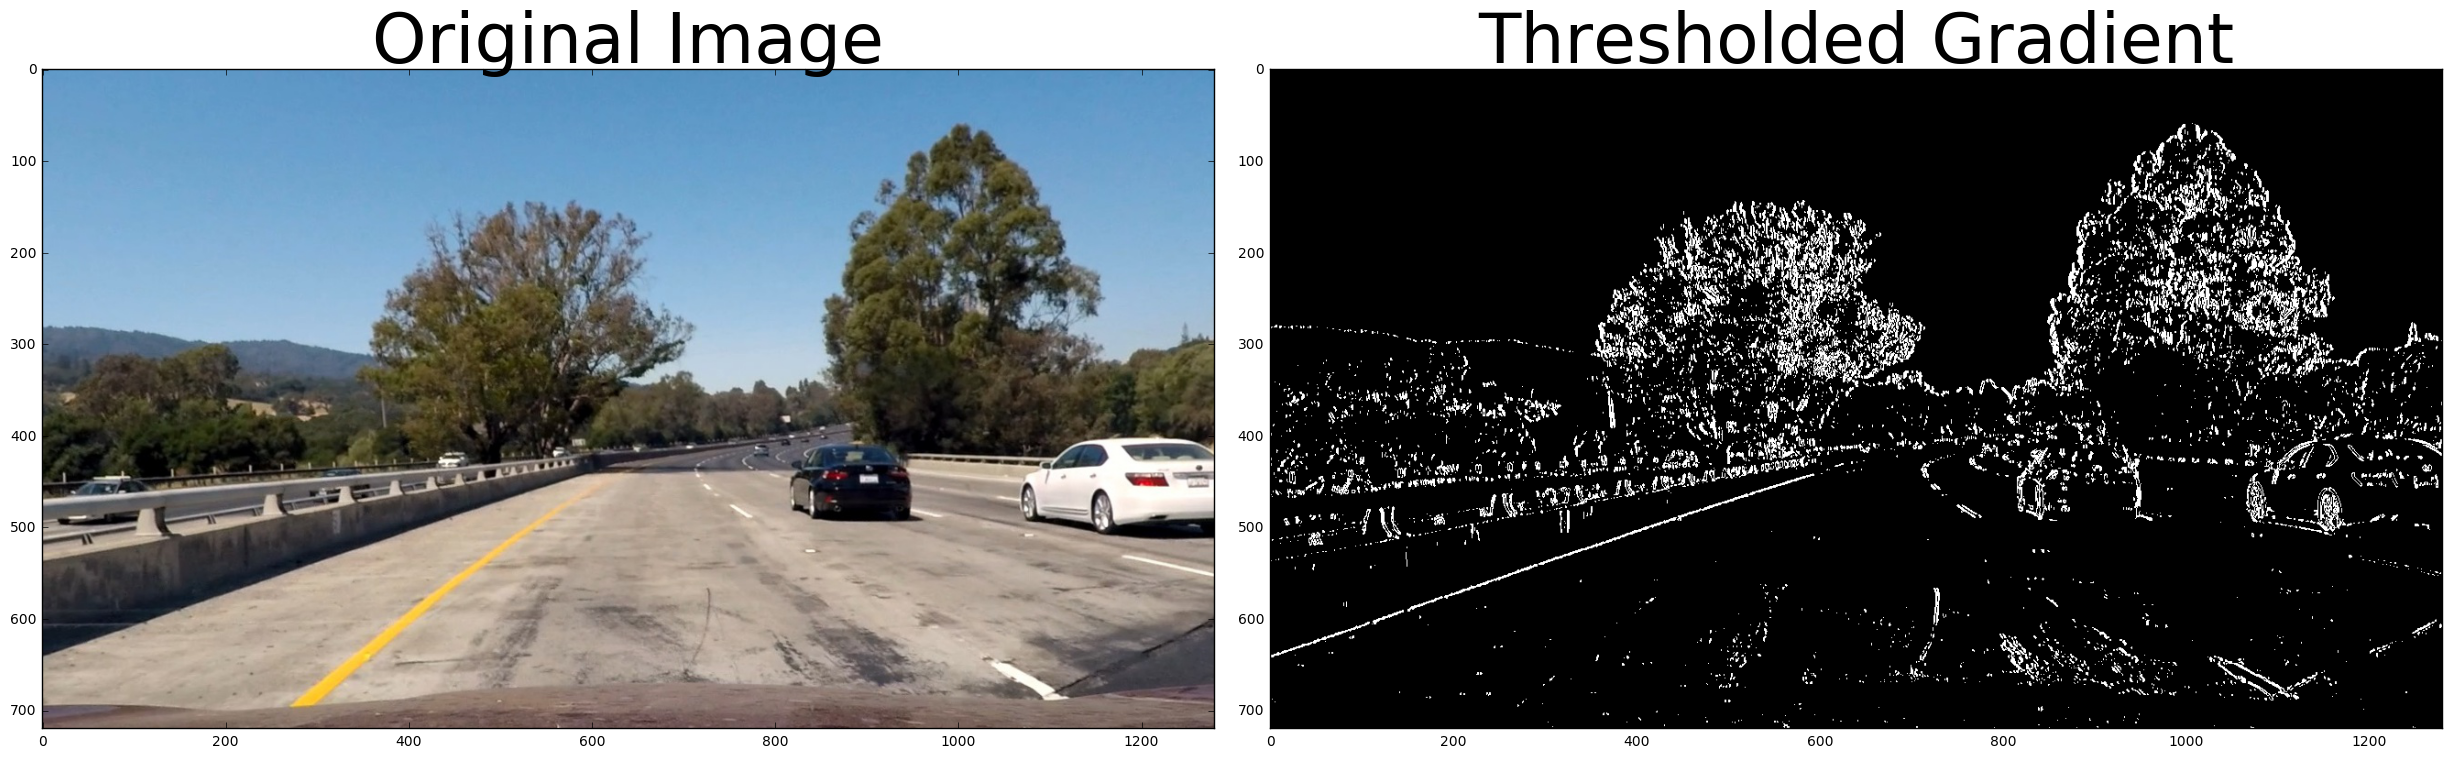

In [3]:
# Read in an image and grayscale it
image = mpimg.imread('output_images/test1_undist.jpg')

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh(img, orient='x', sobel_kernel=3 ,thresh_min=0, thresh_max=255):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == "x":
        sobel = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    elif orient =="y":
        sobel = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    else:
        pass
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    sbinary = np.zeros_like(scaled_sobel)
    sbinary[(scaled_sobel>=thresh_min)&(scaled_sobel<=thresh_max)]=1
    # 6) Return this mask as your binary_output image
    
    binary_output = sbinary # Remove this line
    return binary_output
    
# Run the function
grad_binary = abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=100)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

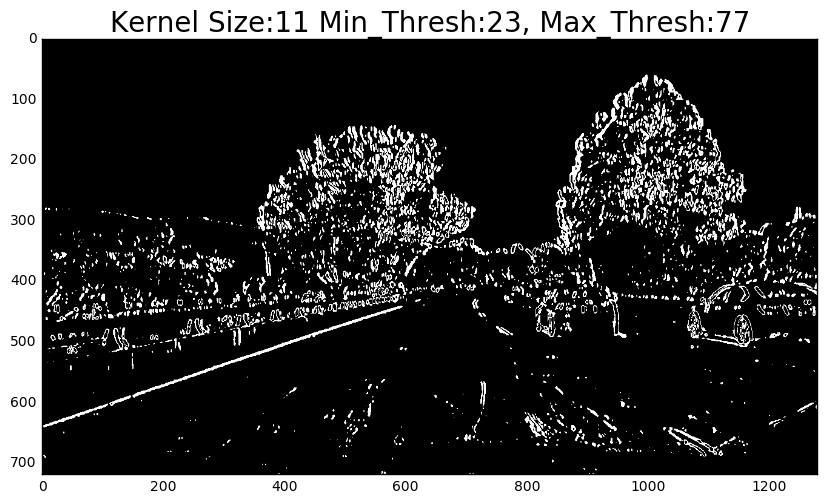

In [11]:
@widgets.interact(orient=widgets.RadioButtons(options=['x', 'y'],value='x',description='Orient:',disabled=False),
                                ksize = widgets.IntSlider(min=3,max=25,step=2,value=11),
                                min_thresh=widgets.IntSlider(min=0,max=255,step=1,value=23),
                                max_thresh=widgets.IntSlider(min=0,max=255,step=1,value=77))
def thresh(orient,ksize,min_thresh,max_thresh):
    grad_binary = abs_sobel_thresh(image, sobel_kernel=ksize,orient=orient, thresh_min=min_thresh, thresh_max=max_thresh)
    
    plt.figure(figsize=(10,8))
    plt.imshow(grad_binary,cmap="gray")
    plt.title("Kernel Size:%s Min_Thresh:%s, Max_Thresh:%s"%(str(ksize),str(min_thresh),str(max_thresh)),fontsize=20)

# Mag Thresh

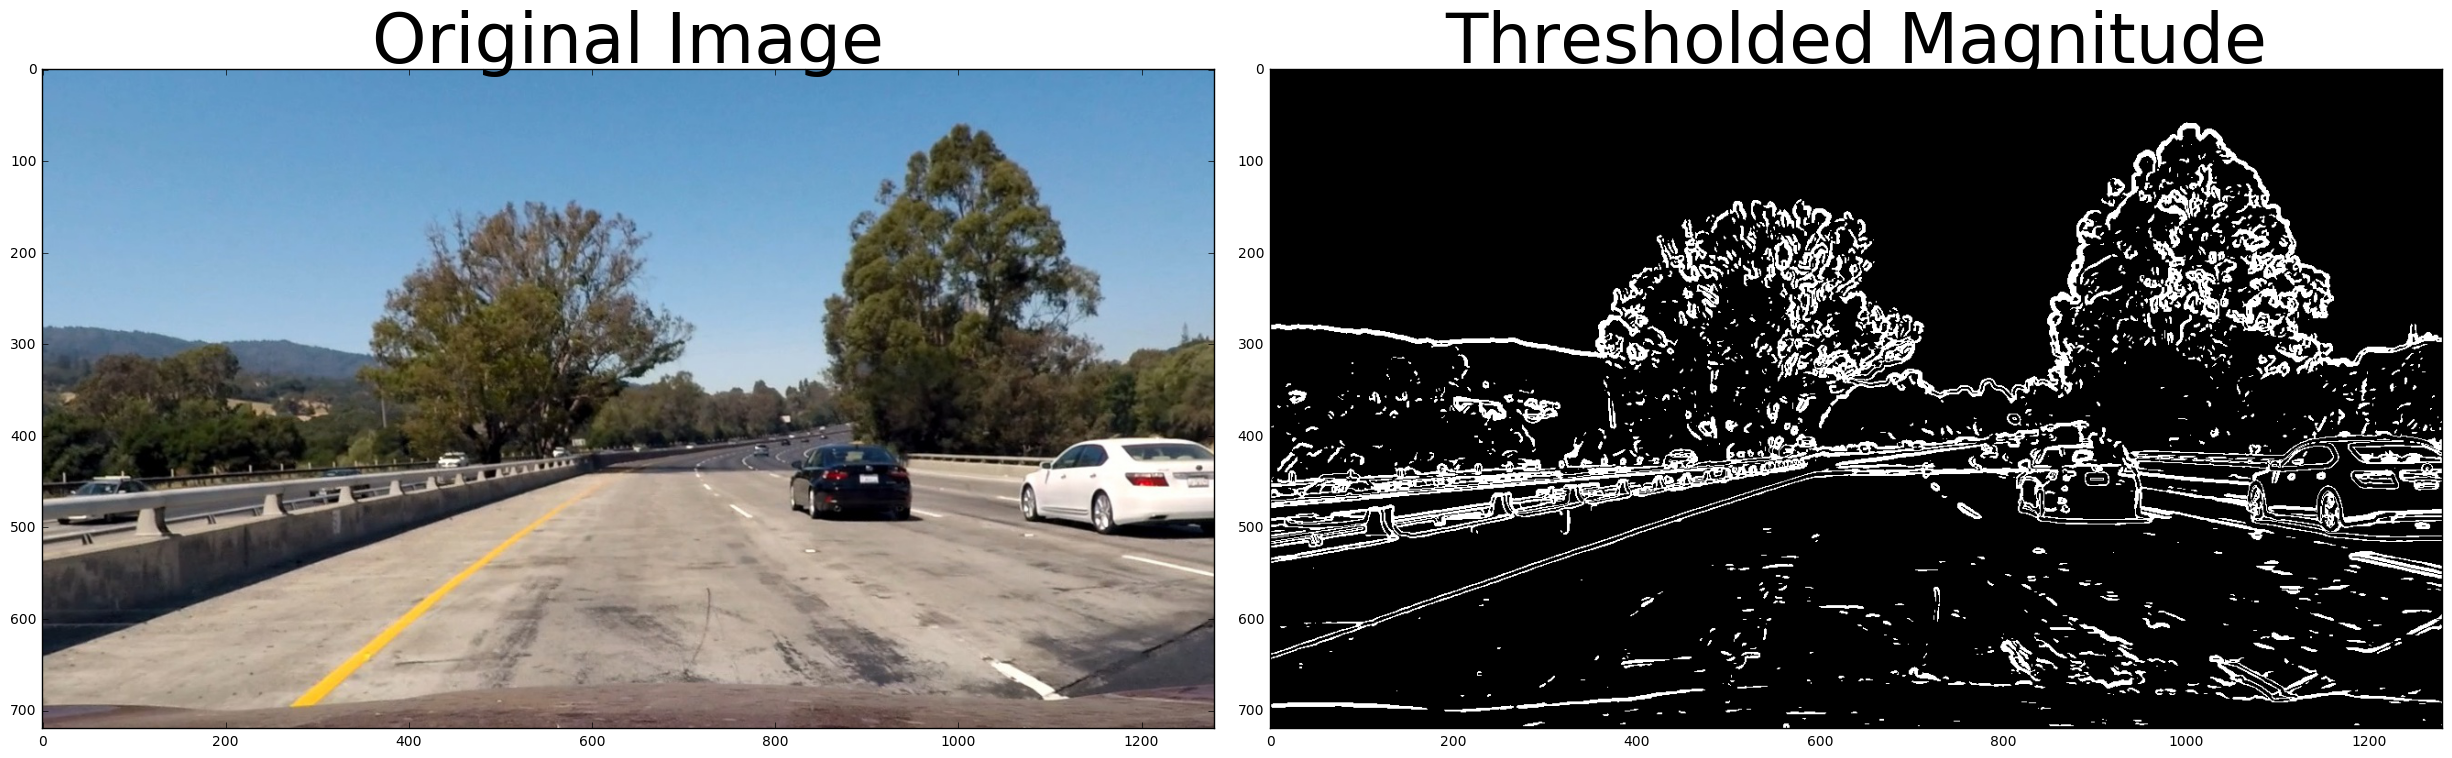

In [12]:
# Read in an image
image = mpimg.imread('output_images/test1_undist.jpg')

# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    # 3) Calculate the magnitude 
    sobelxy = np.sqrt(sobelx**2+sobely**2)
    # 5) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    abssxy = np.absolute(sobelxy)
    scale_factor = np.max(abssxy)/255
    abssxy = (abssxy/scale_factor).astype(np.int8)
    binary_output = np.zeros_like(abssxy)
    binary_output[(abssxy > mag_thresh[0]) & (abssxy < mag_thresh[1])] = 1
    # 6) Create a binary mask where mag thresholds are met
    # 7) Return this mask as your binary_output image
    #binary_output = np.copy(img) # Remove this line
    return binary_output
    
# Run the function
mag_binary = mag_thresh(image, sobel_kernel=11, mag_thresh=(30, 100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded Magnitude', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

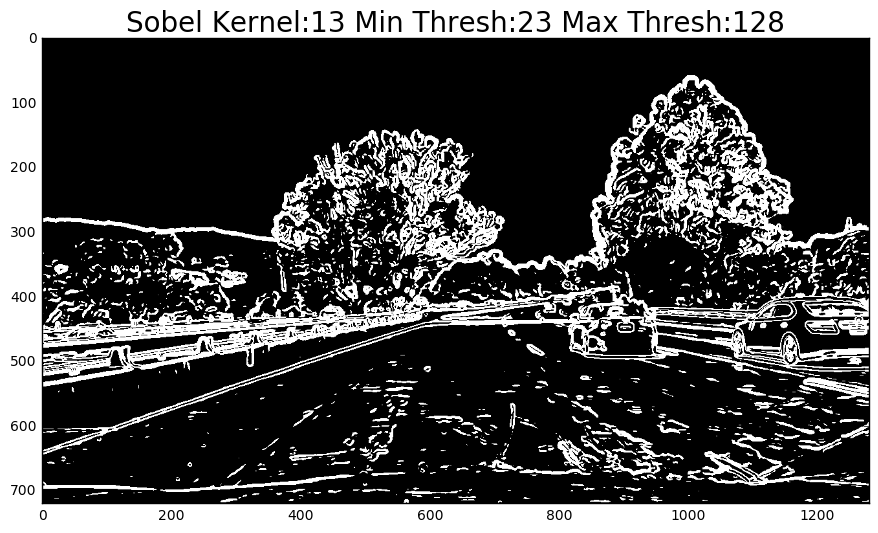

In [14]:
image = mpimg.imread('output_images/test1_undist.jpg')
@widgets.interact(sobel_kernel=widgets.IntSlider(min=3,max=25,step=2,value=11),
                                 min_thresh = widgets.IntSlider(min=0,max=255,step=1,value=30),
                                 max_thresh = widgets.IntSlider(min=0,max=255,step=1,value=100))
def mag(sobel_kernel,min_thresh,max_thresh):
    mag_binary = mag_thresh(image, sobel_kernel=sobel_kernel, mag_thresh=(min_thresh, max_thresh))
    plt.figure(figsize=(12,6))
    plt.imshow(mag_binary,cmap="gray")
    plt.title("Sobel Kernel:%s Min Thresh:%s Max Thresh:%s"%(str(sobel_kernel),str(min_thresh),str(max_thresh)),fontsize=20)
    
    

# Dir Threshold

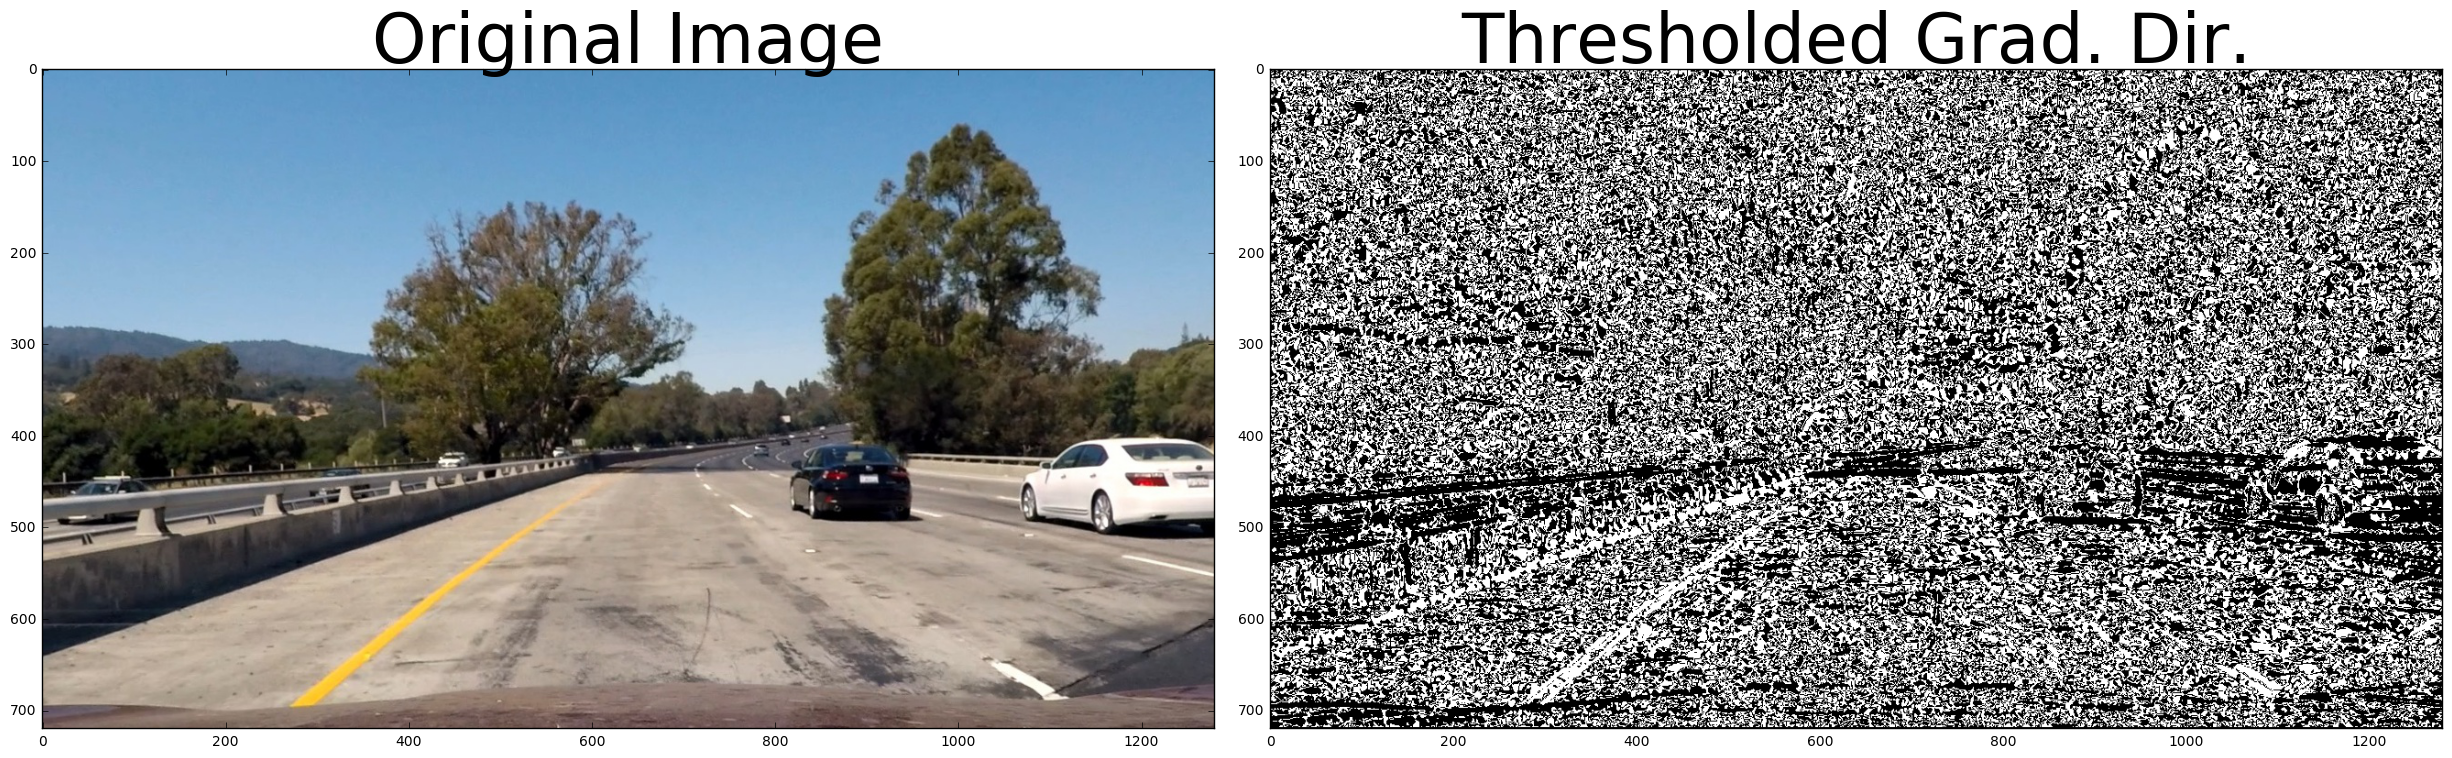

In [15]:
# Read in an image

image = mpimg.imread('output_images/test1_undist.jpg')
# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    arctan = np.arctan2(abs_sobely,abs_sobelx)
    # 5) Create a binary mask where direction thresholds are met
    sarctan = np.zeros_like(arctan)
    sarctan[(arctan>=thresh[0])&(arctan<=thresh[1])]=1
    # 6) Return this mask as your binary_output image
    binary_output = sarctan # Remove this line
    return binary_output
    
# Run the function
dir_binary = dir_threshold(image, sobel_kernel=9, thresh=(0.5, 1.3))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

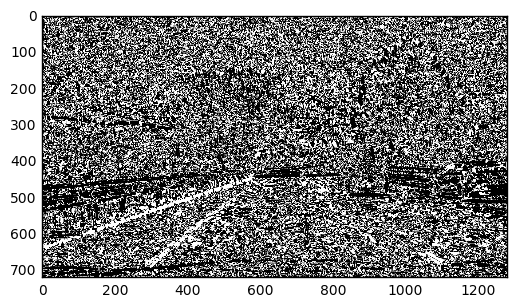

In [17]:
@widgets.interact(sobel_kernel=widgets.IntSlider(min=3,max=25,step=2,value=15),
                                 min_thresh = widgets.FloatSlider(min=0,max=np.pi/2,step=0.05,value=0.7),
                                 max_thresh = widgets.FloatSlider(min=0,max=np.pi/2,step=0.05,value=1.3))
def mag(sobel_kernel,min_thresh,max_thresh):
    dir_binary = dir_threshold(image, sobel_kernel=sobel_kernel, thresh=(min_thresh, max_thresh))
    histogram = np.sum(dir_binary, axis=0)
    plt.imshow(dir_binary,cmap="gray")

# Color Space(HLS)

Color Space: S
(720, 1280)


/Users/Ryosuke/anaconda/envs/Udacity/lib/python3.5/site-packages/ipykernel/__main__.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


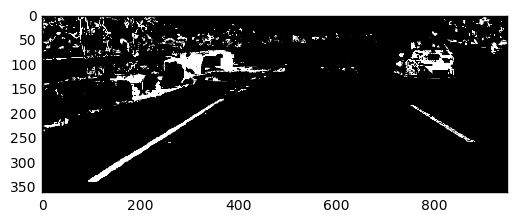

In [23]:
# Read in an image
image = mpimg.imread('output_images/test5_undist.jpg')
#image = mpimg.imread('test_images/solidWhiteRight.jpg')
# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def color_threshold_HLS(img, color_space,thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    HLS = cv2.cvtColor(img,cv2.COLOR_RGB2HLS)
    H= HLS[:,:,0]
    L= HLS[:,:,1]
    S = HLS[:,:,2]
    
    if color_space == "H":
        binary = np.zeros_like(H)
        binary[(H>=thresh[0])&(H<=thresh[1])]=1
        retval, color_space_binary = cv2.threshold(H.astype('uint8'), thresh[0], thresh[1], cv2.THRESH_BINARY)
        print("Color Space:",color_space)
    elif color_space=="L":
        binary = np.zeros_like(L)
        binary[(L>=thresh[0])&(L<=thresh[1])]=1
        retval, color_space_binary = cv2.threshold(L.astype('uint8'), thresh[0], thresh[1], cv2.THRESH_BINARY)
        print("Color Space:",color_space)
    elif color_space=="S":
        binary = np.zeros_like(S)
        binary[(S>=thresh[0])&(S<=thresh[1])]=1
        retval, color_space_binary = cv2.threshold(S.astype('uint8'), thresh[0], thresh[1], cv2.THRESH_BINARY)
        print("Color Space:",color_space)
    return color_space_binary
    # 6) Return this mask as your binary_output image
@widgets.interact(color_space=widgets.RadioButtons(options=['H', 'L', 'S'],value='S',description='Color Space:',disabled=False),
                                   min_thresh = widgets.IntSlider(min=0,max=255,step=1,value=167),
                                 max_thresh = widgets.IntSlider(min=0,max=255,step=1,value=233))
def color_thresh(color_space,min_thresh,max_thresh):
    binary_image = color_threshold_HLS(image,color_space,thresh=(min_thresh,max_thresh))
    print(binary_image.shape)
    plt.imshow(binary_image[binary_image.shape[0]/2:,100:1050],cmap="gray")

# Color Space(RGB)

Color Space: R
(720, 1280)


/Users/Ryosuke/anaconda/envs/Udacity/lib/python3.5/site-packages/ipykernel/__main__.py:39: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Ryosuke/anaconda/envs/Udacity/lib/python3.5/site-packages/ipykernel/__main__.py:40: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


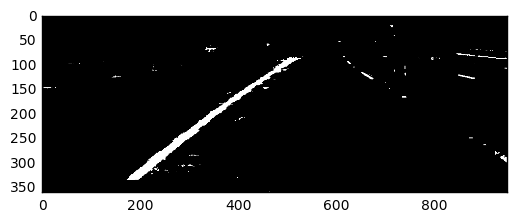

In [24]:
# Read in an image
image = mpimg.imread('output_images/test1_undist.jpg')
#image = mpimg.imread('test_images/solidWhiteRight.jpg')
# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def color_threshold_RGB(img, color_space,thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    
    R= img[:,:,0]
    G= img[:,:,1]
    B = img[:,:,2]
    
    if color_space == "R":
        binary = np.zeros_like(R)
        binary[(R>=thresh[0])&(R<=thresh[1])]=1
        retval, color_space_binary = cv2.threshold(R.astype('uint8'), thresh[0], thresh[1], cv2.THRESH_BINARY)
        print("Color Space:",color_space)
    elif color_space=="G":
        binary = np.zeros_like(G)
        binary[(G>=thresh[0])&(G<=thresh[1])]=1
        retval, color_space_binary = cv2.threshold(G.astype('uint8'), thresh[0], thresh[1], cv2.THRESH_BINARY)
        print("Color Space:",color_space)
    elif color_space=="B":
        binary = np.zeros_like(B)
        binary[(B>=thresh[0])&(B<=thresh[1])]=1
        retval, color_space_binary = cv2.threshold(B.astype('uint8'), thresh[0], thresh[1], cv2.THRESH_BINARY)
        print("Color Space:",color_space)
    return color_space_binary
    # 6) Return this mask as your binary_output image
@widgets.interact(color_space=widgets.RadioButtons(options=['R', 'G', 'B'],value='R',description='Color Space:',disabled=False),
                                   min_thresh = widgets.IntSlider(min=0,max=255,step=1,value=215),
                                 max_thresh = widgets.IntSlider(min=0,max=255,step=1,value=255))
def color_thresh(color_space,min_thresh,max_thresh):
    binary_image = color_threshold_RGB(image,color_space,thresh=(min_thresh,max_thresh))
    print(binary_image.shape)
    histogram = np.sum(binary_image[binary_image.shape[0]/2:,100:1050], axis=0)
    plt.imshow(binary_image[binary_image.shape[0]/2:,100:1050],cmap="gray")
    #f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24, 9))
    #f.tight_layout()
    #ax1.imshow(image)
    #ax2.plot(histogram)
    #ax1.imshow(binary_image[binary_image.shape[0]/2:,100:1050],cmap="gray")
    